### Introduction to pdvega
Full article at [pbpython.com](http://pbpython.com/pdvega.html)

In [2]:
import pandas as pd
import pdvega

In [3]:
%matplotlib inline

Read in the FiveThirtyEight data on candy

In [4]:
df = pd.read_csv("https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv?raw=True")

In [5]:
# Clean up broken apostrophe
df['competitorname'].replace(regex=True,inplace=True,to_replace=r'Õ',value=r"'")

In [6]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Try a pandas plot first

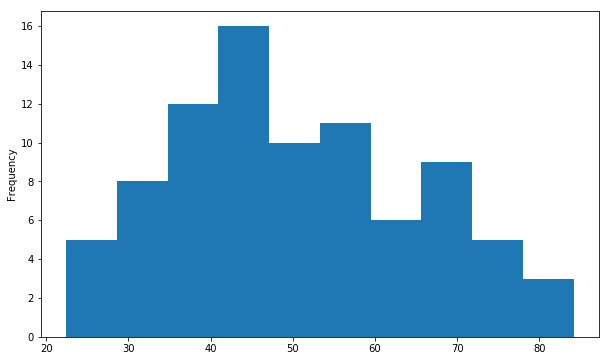

In [17]:
df["winpercent"].plot.hist(figsize=(10,6))

Try the same thing using pdvega

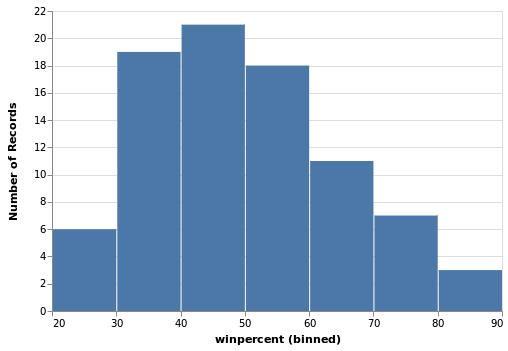

In [21]:
df["winpercent"].vgplot.hist()

KDE plots work as expected

/home/lhphong/anaconda3/lib/python3.7/site-packages/pdvega/_core.py:79: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[x], ordinal_threshold=0)
/home/lhphong/anaconda3/lib/python3.7/site-packages/pdvega/_core.py:83: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[y], ordinal_threshold=0)


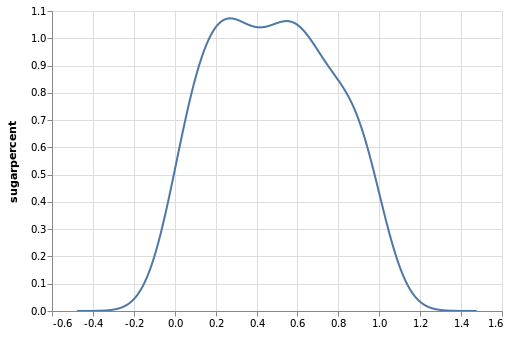

In [9]:
df["sugarpercent"].vgplot.kde()

We can look at the sugar and price percentile distributions

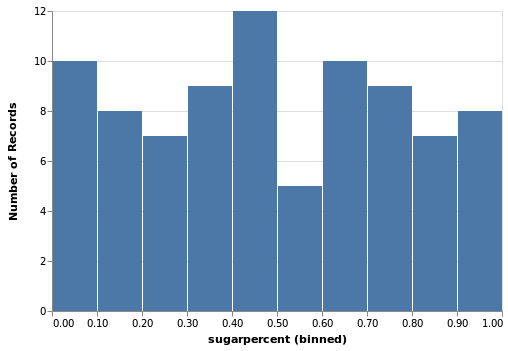

In [10]:
df["sugarpercent"].vgplot.hist()

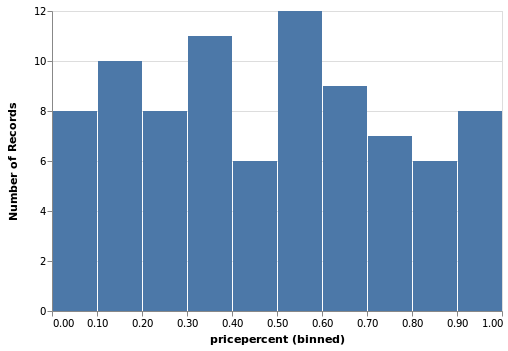

In [15]:
df["pricepercent"].vgplot.hist()

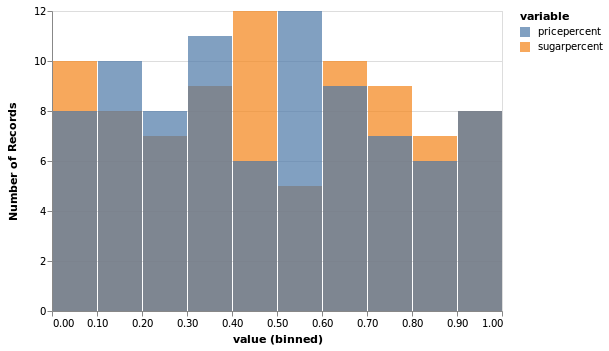

In [29]:
df[["sugarpercent", "pricepercent"]].vgplot.hist()

Compare it to the pure pandas example

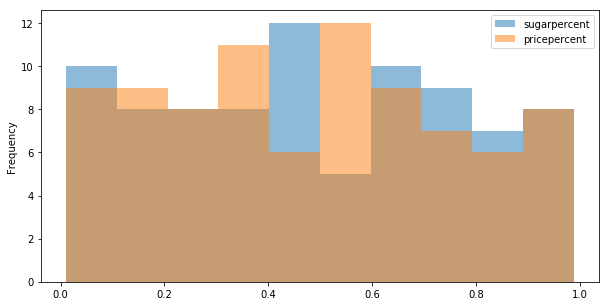

In [23]:
df[["sugarpercent", "pricepercent"]].plot.hist(alpha=0.5, figsize=(10,5))

Let's try some scatter plots

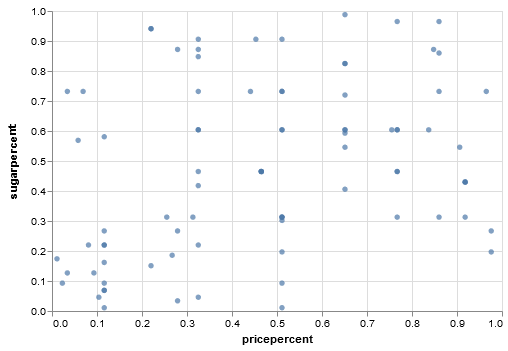

In [45]:
df.vgplot.scatter(x='pricepercent', y='sugarpercent')

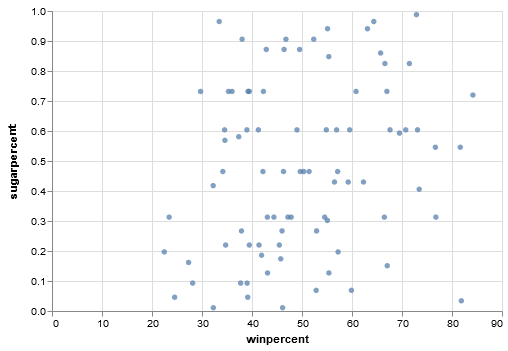

In [46]:
df.vgplot.scatter(x='winpercent', y='sugarpercent')

The pandas version does not look as nice

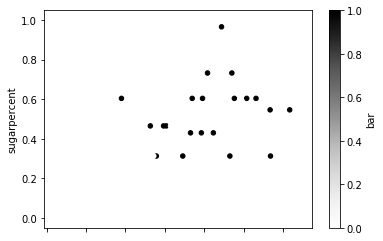

In [15]:
df.plot.scatter(x='winpercent', y='sugarpercent', c='bar')

pdvega suppports encoding the size and color based on values in columns of the dataframe

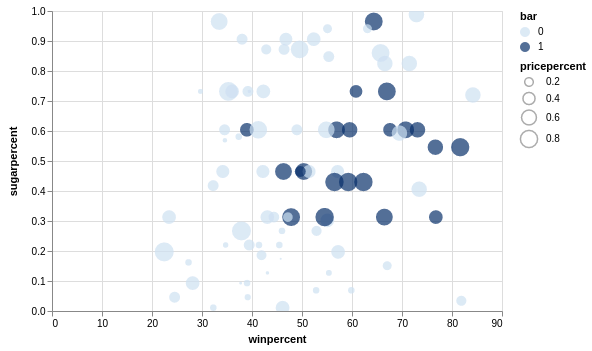

In [16]:
df.vgplot.scatter(x='winpercent', y='sugarpercent', s='pricepercent', c='bar')

The scatter matrix is really helpful

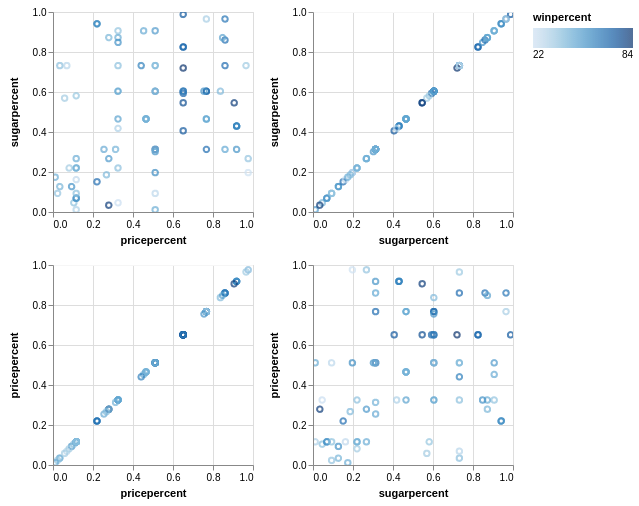

In [17]:
pdvega.scatter_matrix(df[["sugarpercent", "winpercent", "pricepercent"]], "winpercent")

Here's a simple bar chart.
Unfortunately I could not figure out how to sort by the winpercent

In [18]:
df.sort_values(by=['winpercent'], ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


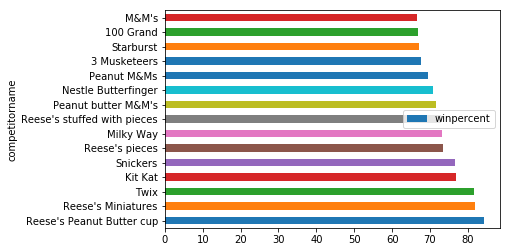

In [19]:
df.sort_values(by=['winpercent'], ascending=False).head(15).plot.barh(x='competitorname', y='winpercent')

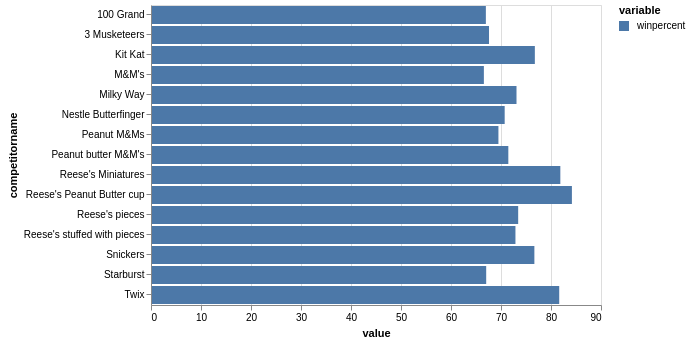

In [20]:
df.sort_values(by=['winpercent'], ascending=False).head(15).vgplot.barh(x='competitorname', y='winpercent')